In [1]:
import numpy as np # 
import pandas as pd # 
%matplotlib inline

In [2]:
#data = pd.read_csv('../input/train.csv')
digits = pd.read_csv('data/train.csv')
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
a = digits.iloc[3,1:].values
#a = a[1:]

In [4]:
b = a.reshape((28,28))
print(b)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 220 179   6   0   0   0   0   0   0   0   0   9
   77   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  28 247  17   0   0   0   0   0   0   0   0  27
  202   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 242 155   0   0   0   0   0   0   0   0  27
  254  63   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 160 207   6   0   0   0   0   0   

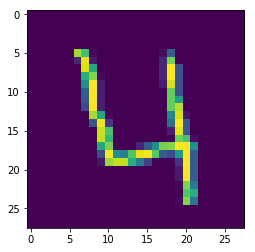

In [5]:
import matplotlib.pyplot as plt
plt.imshow(b)

In [6]:
X=digits.iloc[:,1:].values
y=digits.iloc[:,0].values

X=np.divide(X,255.)
#y=np.divide(y,255.)

# create dummie variables for target
from keras.utils.np_utils import to_categorical
y = to_categorical(y)

Using Theano backend.


In [7]:
#X[1,]
X.shape

(42000, 784)

In [8]:
y.shape

(42000, 10)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [62]:
model = Sequential()
#~~~~~ below got 94%
#model.add(Dense(15,activation='relu',input_shape=(784,)))
#model.add(Dense(15,activation='relu'))
#model.add(Dense(5,activation='relu'))
#model.add(Dense(10,activation='softmax'))
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#history=model.fit(X,y,validation_split=0.3,callbacks=[EarlyStopping(patience=5)],nb_epoch=50)
#~~~~~

#~~~~~ below gets 96%
#model.add(Dense(100,activation='relu',input_shape=(784,)))
#model.add(Dense(15,activation='relu'))
#model.add(Dense(10,activation='softmax'))
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#history=model.fit(X,y,validation_split=0.3,callbacks=[EarlyStopping(patience=5)],nb_epoch=50)
#~~~~~~

# ~~~~~ below gets 97%
#model.add(Dense(150,activation='relu',input_shape=(784,)))
#model.add(Dense(100,activation='relu'))
#model.add(Dense(50,activation='relu'))
#model.add(Dense(10,activation='softmax'))
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#history=model.fit(X,y,validation_split=0.3,callbacks=[EarlyStopping(patience=5)],nb_epoch=50)

model.add(Dense(200,activation='relu',input_shape=(784,)))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#history=model.fit(X,y,validation_split=0.2,nb_epoch=30)
history=model.fit(X,y,validation_split=0.3,callbacks=[EarlyStopping(patience=5)],nb_epoch=50)


Train on 29399 samples, validate on 12601 samples
Epoch 1/50
29399/29399 [==============================] - 6s - loss: 0.2960 - acc: 0.9066 - val_loss: 0.1595 - val_acc: 0.9518

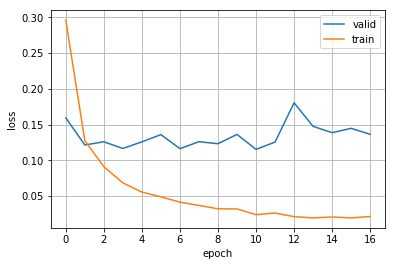

In [64]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['valid','train'])

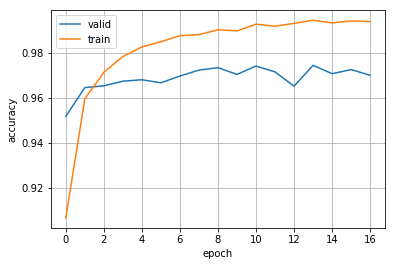

In [66]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.legend(['valid','train'])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [34]:
# predict on test set and write csv file for submission
test = pd.read_csv('data/test.csv')
#X_test = test.iloc[:,1:].values
test.head()
#preds = model.predict(test)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
test.shape

(28000, 784)

In [36]:
preds = model.predict_classes( np.divide(test.values,255.) )
#preds = model.predict(test)

25664/28000 [==========================>...] - ETA: 0s

In [37]:
preds

array([2, 0, 9, ..., 3, 9, 2])

In [38]:
results = pd.DataFrame({'Label':preds})
results.head()

,Label
0,2
1,0
2,9
3,9
4,3


In [39]:
results.index+=1
results = results.reindex(results.index.rename('ImageId'))
results.head()

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3


In [40]:
results.to_csv('results.csv', header=True)